#### Combine all of the cleaned subsetted adatas per cell together
#### Produce metadata figures

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

from collections import Counter
import seaborn as sns
import scanpy as sc 
import os
import gc

In [2]:
cleaned_indiv_adata_dir = "scvi_post_subclustering/"
adata_files = os.listdir(cleaned_indiv_adata_dir)

In [3]:
sc._settings.settings._vector_friendly=True

### Concatenate each of the cell type specific adata files

In [4]:
%%time
adata_list = list()

for adata_file in adata_files: 
    cell_type_adata = sc.read_h5ad(cleaned_indiv_adata_dir  + adata_file)
    adata_list.append(cell_type_adata)

CPU times: user 19.1 s, sys: 1min 39s, total: 1min 59s
Wall time: 2min 27s


In [5]:
%%time
adata = sc.concat(adata_list)
adata

CPU times: user 1min 31s, sys: 7min 32s, total: 9min 3s
Wall time: 9min 5s


AnnData object with n_obs × n_vars = 2305964 × 16115
    obs: 'age', 'donor_id', 'sex', 'region', 'cell_type', 'disease', 'consistent_cell_type', 'study', 'technology', 'cell_or_nuclei', 'barcode', 'sample_id', 'age_status', 'tech_plus_study', 'disease_binary', 'decade', 'age_group', '_scvi_batch', '_scvi_labels', 'leiden_scVI', 'scvi_cell_type', 'redo_leiden_0.5', 'UMAP1', 'UMAP2', 'v2_scvi_cell_type'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    layers: 'counts', 'scvi_normalized'

In [6]:
Counter(adata.obs['v2_scvi_cell_type'])

Counter({'Cardiomyocyte': 676654,
         'Fibroblast': 548613,
         'Endothelial': 317124,
         'Pericyte': 281784,
         'Myeloid': 241337,
         'Lymphoid': 69128,
         'vSMC': 59357,
         'Endocardial': 42582,
         'Neuronal': 22613,
         'LEC': 13723,
         'Adipocyte': 12098,
         'Epicardial': 11993,
         'Mast': 8958})

In [9]:
Counter(adata.obs['disease'])

Counter({'ND': 1212319,
         'DCM': 564000,
         'HCM': 225919,
         'pediatric HF': 92121,
         'ICM': 69611,
         'ARVC': 67834,
         'AMI': 66978,
         'NCCM': 7182})

In [10]:
Counter(adata.obs['disease_binary'])

Counter({'N': 1212319, 'Y': 1093645})

### Save the combined scVI adata object, with and without the scvi_normalized layer (which takes up a lot of RAM to load in)

In [11]:
%%time
adata.write("05E_all_snRNA_adata.h5ad")

CPU times: user 35.1 s, sys: 2min 18s, total: 2min 53s
Wall time: 3min 21s


In [12]:
%%time
del adata.layers['scvi_normalized']
# create a copy to remove the scvi_normalized layer, to reduce space
adata.write("05E_all_snRNA_adata_without_scvi.h5ad")

CPU times: user 22.5 s, sys: 1min 31s, total: 1min 54s
Wall time: 2min 5s


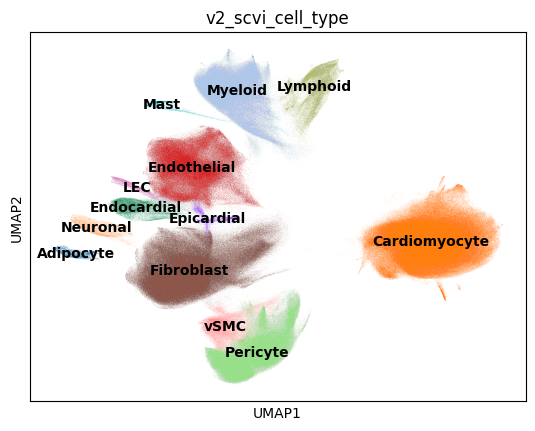

In [13]:
sc.pl.umap(adata, color = ["v2_scvi_cell_type"], legend_loc = "on data")